In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np

# 1. CARGA DEL FICHERO DE DATOS
file_path = "./DatosCaudalesBesos.csv"  # Cambia esto por la ruta de tu archivo si es diferente
TotalDat = pd.read_csv(file_path, encoding='latin1')

# 2. Inspección de los datos
print(TotalDat.info())     # Estructura de los datos
print(TotalDat.head())     # Ver las primeras filas
print(TotalDat.columns)    # Ver los nombres de las variables

# 3. Modificación de los tipos de datos y creación de nuevas variables
TotalDat['Estacio'] = TotalDat['Estacio'].astype('category')  # Convertir 'Estacio' a categoría
print(TotalDat['Estacio'].unique())  # Ver los valores únicos de la variable 'Estacio'

# 3.1 Renombrar con nombres cortos las estaciones de aforo y medida
# Nombres actuales
print(TotalDat['Estacio'].cat.categories)

# Definir los nuevos nombres cortos
nuevos_nombres = {
    'Aforament - Castellar del Vallès': "Castellar",
    'Aforament - Aiguafreda (riu)': "Aiguafreda",
    'Aforament - Montornès del Vallès (el Mogent)': "Montornes",
    'Aforament - Santa Perpètua de Mogoda': "Santa_Perpetua",
    'Aforament - Santa Coloma de Gramenet (riu)': "Santa_Coloma",
    'Aforament - Lliçà de Vall': "Llica_de_Vall",
    'Aforament - Montcada i Reixac (el Ripoll)': "Montcada_Reixac",
    'Aforament - la Garriga': "La_Garriga"
}

# Asignar los nuevos nombres
TotalDat['Estacio'] = TotalDat['Estacio'].replace(nuevos_nombres)
print(TotalDat.head())

# 3.2 Asegurarse de que la columna 'Dia' esté en formato de fecha
TotalDat['Fecha'] = pd.to_datetime(TotalDat['Dia'], format="%m/%d/%Y")

# Extraer el año correctamente ahora que la columna 'Fecha' está en el formato correcto
TotalDat['Year'] = TotalDat['Fecha'].dt.year

# Verificar si se creó la columna 'Year'
print(TotalDat.head())

# 3.3 Creación de nuevas variables (mes, año)
TotalDat['Mes'] = TotalDat['Fecha'].dt.month  # Extraer el mes
TotalDat['Year'] = TotalDat['Fecha'].dt.year  # Extraer el año

# 3.4 Mostrar las primeras filas para revisar las nuevas variables
print(TotalDat.head())

# 4. Cuántos datos tiene cada estación
print(TotalDat['Estacio'].value_counts())

# 5 Detección y eliminación de datos duplicados
DF_Montornes = TotalDat[TotalDat['Estacio'] == "Montornes"]

# Ordenar el dataframe por la columna 'Fecha'
DF_Montornes = DF_Montornes.sort_values(by='Fecha')
print(DF_Montornes.head())

# Eliminar las filas duplicadas
TotalDat = TotalDat.drop_duplicates()

# ORDENAR LAS ESTACIONES en el orden deseado
estaciones_ordenadas = ['Llica_de_Vall', 'Santa_Perpetua', 'Montornes', 
                        'Aiguafreda', 'La_Garriga', 'Montcada_Reixac', 
                        'Santa_Coloma', 'Castellar']
TotalDat['Estacio'] = pd.Categorical(TotalDat['Estacio'], categories=estaciones_ordenadas, ordered=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24952 entries, 0 to 24951
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Dia      24952 non-null  object 
 1   Estacio  24952 non-null  object 
 2   Valor    24842 non-null  float64
dtypes: float64(1), object(2)
memory usage: 584.9+ KB
None
         Dia                           Estacio  Valor
0  7/29/2000  Aforament - Castellar del Vallès   2.06
1  7/30/2000  Aforament - Castellar del Vallès   2.00
2  7/31/2000  Aforament - Castellar del Vallès   1.96
3   8/1/2000  Aforament - Castellar del Vallès   1.64
4   8/2/2000  Aforament - Castellar del Vallès   1.52
Index(['Dia', 'Estacio', 'Valor'], dtype='object')
['Aforament - Castellar del Vallès', 'Aforament - Aiguafreda (riu)', 'Aforament - Montornès del Vallès (el Mogent)', 'Aforament - Santa Perpètua de Mogoda', 'Aforament - Santa Coloma de Gramenet (riu)', 'Aforament - Lliçà de Vall', 'Aforament - Montcada i Reixac (el R

In [73]:
# Ver la tabla de frecuencia para la variable 'Estacio'
print(TotalDat['Estacio'].value_counts())

Estacio
Montcada_Reixac    3648
Llica_de_Vall      3646
Santa_Perpetua     3604
Montornes          3047
Santa_Coloma       2692
Castellar          2577
Aiguafreda         1493
La_Garriga         1198
Name: count, dtype: int64


In [74]:
# 6. Contar el número de datos por estación y por año
tabla_contingencia = TotalDat.groupby(['Estacio', 'Year']).size().reset_index(name='Count')

# Crear el gráfico interactivo con Plotly
fig = px.bar(tabla_contingencia, x='Year', y='Count', color='Estacio', 
             title="Número de datos para cada estación por año", 
             labels={"Count": "Número de Datos", "Year": "Año", "Estacio": "Estación"},
             barmode='group',  # Puedes usar 'stack' para barras apiladas o 'group' para barras agrupadas
             text='Count', hover_name="Estacio")

# Personalizar el diseño del gráfico
fig.update_layout(
    xaxis_title="Año",
    yaxis_title="Número de Datos",
    legend_title="Estaciones",
    bargap=0.2,
    hovermode="x unified"
)

# Mostrar el gráfico interactivo
fig.show()

In [75]:
# 1. Calcular el caudal medio anual para cada estación por año
caudal_medio_anual = TotalDat.groupby(['Estacio', 'Year']).agg({'Valor': 'mean'}).reset_index()

# 2. Crear el gráfico de barras interactivo con Plotly
fig = px.bar(caudal_medio_anual, x='Year', y='Valor', color='Estacio', 
             title="Caudal Medio Anual por Estación", 
             labels={"Valor": "Caudal Medio (m³/s)", "Year": "Año", "Estacio": "Estación"},
             barmode='group',  # Puedes cambiar a 'stack' si prefieres barras apiladas
             text='Valor', hover_name="Estacio")

# Personalizar el diseño del gráfico
fig.update_layout(
    xaxis_title="Año",
    yaxis_title="Caudal Medio Anual (m³/s)",
    legend_title="Estaciones",
    bargap=0.15,  # Espacio entre las barras
    hovermode="x unified"
)

# Mostrar el gráfico interactivo
fig.show()

In [76]:
# 5. Crear el gráfico de bigotes (boxplot) con Plotly
fig = px.box(TotalDat, x='Estacio', y='Valor', 
             title="Distribución de Caudales por Estación", 
             labels={"Valor": "Caudal (m³/s)", "Estacio": "Estación"},
             points="all")  # 'points="all"' añade todos los puntos atípicos en el gráfico

# Personalizar el diseño del gráfico
fig.update_layout(
    xaxis_title="Estación",
    yaxis_title="Caudal (m³/s)",
    boxmode='group',  # Agrupar las cajas por estación
)

# Mostrar el gráfico interactivo
fig.show()

<Figure size 1000x600 with 0 Axes>

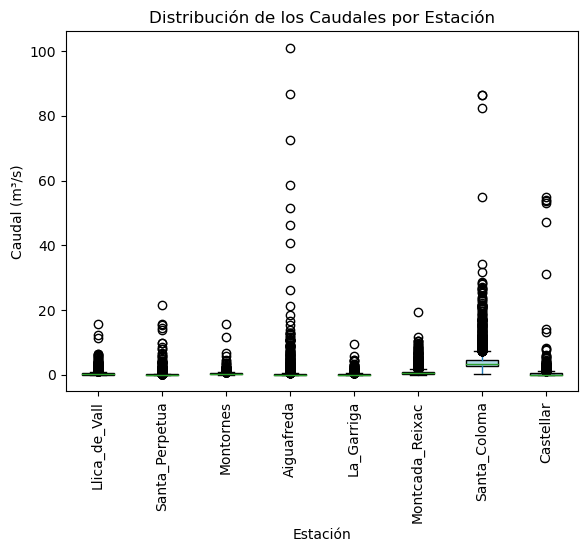

<Figure size 1000x600 with 0 Axes>

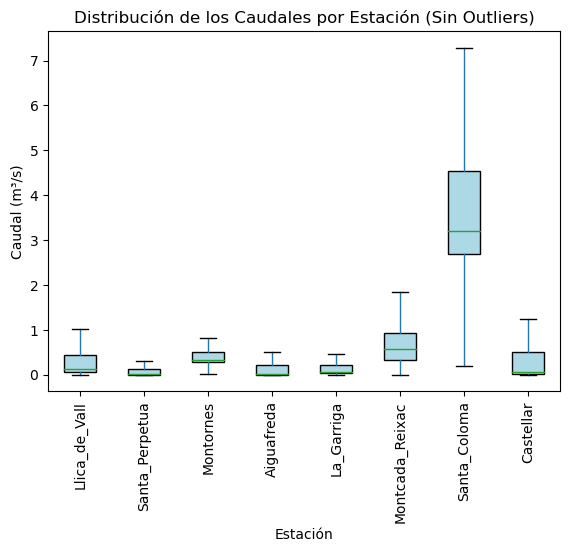

In [89]:
# Calcular la desviación estándar (variabilidad) por estación
variabilidad = TotalDat.groupby('Estacio')['Valor'].std()

# Graficar la distribución de los caudales por estación (Boxplot con outliers)
plt.figure(figsize=(10, 6))
TotalDat.boxplot(column='Valor', by='Estacio', grid=False, showfliers=True, patch_artist=True, boxprops=dict(facecolor="lightblue"))
plt.title("Distribución de los Caudales por Estación")
plt.suptitle("")
plt.xlabel("Estación")
plt.xticks(rotation=90)
plt.ylabel("Caudal (m³/s)")
plt.show()

# Graficar la distribución de los caudales por estación (Boxplot sin outliers)
plt.figure(figsize=(10, 6))
TotalDat.boxplot(column='Valor', by='Estacio', grid=False, showfliers=False, patch_artist=True, boxprops=dict(facecolor="lightblue"))
plt.title("Distribución de los Caudales por Estación (Sin Outliers)")
plt.suptitle("")
plt.xlabel("Estación")
plt.xticks(rotation=90)
plt.ylabel("Caudal (m³/s)")
plt.show()


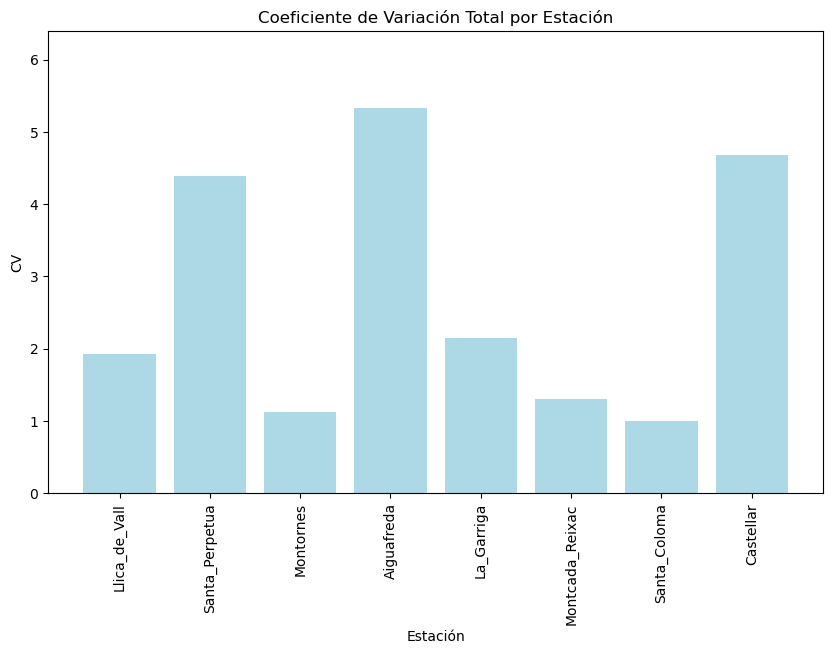

In [88]:
# Definir la función para el coeficiente de variación (CV)
def calc_cv(x):
    return x.std() / x.mean()

# Calcular el coeficiente de variación por estación
cv = TotalDat.groupby('Estacio')['Valor'].apply(calc_cv).reset_index(name='CV')

# Graficar el coeficiente de variación
plt.figure(figsize=(10, 6))
plt.bar(cv['Estacio'], cv['CV'], color="lightblue")
plt.title("Coeficiente de Variación Total por Estación")
plt.xlabel("Estación")
plt.ylabel("CV")
plt.xticks(rotation=90)
plt.ylim(0, max(cv['CV']) * 1.2)  # Ajustar el rango Y para visualizar mejor
plt.show()
